# Introduction to Data Science 2025

# Week 5

## Exercise 1 | Privacy and data protection

First, look up the [European Data Protection Regulation](http://eur-lex.europa.eu/legal-content/EN/TXT/PDF/?uri=CELEX:32016R0679&from=en) (“GDPR”). Note that Articles 1-99 start on p. 32 of the document. We will refer to the articles and their parts by, e.g., “Art 6 (1) a) GDPR” which means Article 6 (“Lawfulness of processing”), first paragraph, item a in the GDPR.

1. Valid Consent?

    Find a service you use to which you have given *consent* for the processing of your personal data (Art 6 (1) a) GDPR). Have a look at the privacy notices, policies, or settings of this service.

    - Are the basic legal conditions for this consent in your opinion in line with the new requirements and conditions set by the GDPR?

    - You should provide an answer with justification based on the GDPR, where you refer to specific articles and paragraphs.

2. Your Right to Access your Personal Data

    You have the right to know if personal data about you is processed by a controller. You also have the right to get access to, for example, the processing purposes, the data categories, data transfers, and duration of storage.

    - Find the relevant parts in GDPR and study your rights as a “data subject”.

    - File a right-to-access request with a data processing service of your choosing. Describe the mechanism that is put in place by the service to enable you to exercise this right (if any).

    - Whether you get a response or not, think about how well your rights as a data subject are respected in practice. Your answer should again refer to specific articles and paragraphs of the GDPR.

3. Anonymisation & Pseudonymisation

    - What is the difference between anonymisation and pseudonymisation of personal data?

**Submit your findings in a PDF file, just a short report is enough.**

### Exercise 1 

1. Did I give valid consent? (Example: Spotify, marketing emails/personalization)
   When I turned on marketing emails in Spotify, I saw clear switches for different things (for example, marketing emails vs. product news). That matters because consent has to be a real choice and not bundled (GDPR Art. 6(1)(a) and Art. 4(11); see also Recital 32). They also showed a link to the privacy policy at the time of the choice, so I knew what data is used and why (Arts. 12–13). I can undo my choice easily (unsubscribe or a toggle in settings), which GDPR requires (Art. 7(3)).
   My opinion: This looks like valid consent because it is specific, informed, and easy to take back. If the service forced me to agree to many things at once or hid the unsubscribe, then it would not be valid.

2. My right to access my data (what I did and what the law says)
   GDPR says I can ask a company if they have my data and get a copy plus details like purposes, what kinds of data, who gets it, and how long it’s kept (Art. 15). The reply should be clear and come within one month (Art. 12(1) and 12(3)), and it should be free in normal cases (Art. 12(5)).
   In practice, I used Spotify’s account privacy page to request my data. I logged in, clicked the request, and later got files to download. This felt straightforward and in line with the rules. If a company ignored me or made it very hard, I could complain to a data protection authority (Art. 77) or even go to court (Art. 79).

3. Anonymisation vs. pseudonymisation (what’s the difference?)

* Pseudonymisation: Your name or ID is replaced with a code, but someone (with the key) can still link it back to you. This is still personal data, so GDPR applies (definition in Art. 4(5)).
* Anonymisation: Data is changed so that nobody can reasonably figure out who you are anymore. Properly anonymous data is outside GDPR (explained in Recital 26).
  Easy rule: If it can be reversed or linked to you with reasonable effort, it’s not anonymous—just pseudonymous.


## Exercise 2 | Fairness-aware AI

This template generates data about the working hours and salaries of n=5000 people. The salary equals 100 x working hours plus/minus normal distributed noise. If you run the template, it produces an _hours_ vs _monthly salary_ scatter plot with gender=0 (men) in orange and gender=1 (women) in orange. The plot includes a trend line for each group, and an overall trend line for all data combined (in red). 

A linear regression model (see the next code cell) that only includes the working hours as a covariate *without* the protected characteristic (gender) should have slope close to 100.0.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Simulating the data

In [2]:
#sample size n
n = 5000

# gender
gen = np.random.binomial(1, 0.5, size=n)

# work hours
hrs = np.random.binomial(60, 0.5, size=n)

# salary = 100 * hours + noise (std.deviation 10)
sal = hrs * np.random.normal(100, 10, size=n) 

# create a nice data frame
data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})

### Scatterplot of the simulated data
Women samples (gender = 1) are shown with blue, men samples (gender = 0) are shown in orange.
Blue and orange lines are the trend lines of each group accordingly.
The overall trend line is shown in red.

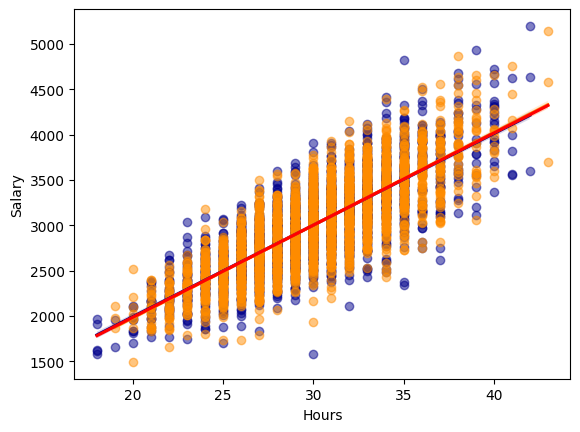

In [3]:
sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data, marker="None", color="red")

plt.show()

### Linear regression
Learn the overall regression model, which is what an algorithm with no access to the gender ("protected characteristic") would learn from the data.

In [4]:
reg = LinearRegression().fit(hrs.reshape(-1,1), sal.reshape(-1,1))

# print out the slope: it should be close to 100.0 without learning the 'protected characteristic' (gender)
print("slope: %.1f" % reg.coef_[0][0])

slope: 101.5


### Task

Now edit the code to simulate each of the following scenarios:

a) the salary of women is reduced by 200 euros ("direct discrimination")

b) the working hours of men are binomially distributed with parameters (60, 0.55) while the working hours of women are binomially distributed with parameters (60, 0.45), no changes in per-hour salary ("no discrimination")

c) both of the above changes at the same time ("indirect discrimination")

You should be able to demonstrate that the slope of the linear regression model is only changed in one of these scenarios.

Based on this experiment, answer the following questions:
1. In which of the scenarios the slope (coefficient) of the regression model changes?
2. How could you model the data in a way that enables you to detect indirect discrimination? _Hint_: Should you include the protected characteristic in the model or not?

To answer the second question, demonstrate your solution by building a regression model and interpreting the estimated coefficients.

**Submit this exercise by submitting your code and your answers to the above questions on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

Overall slope (should be near 100): 101.54
Overall intercept: -44.83
Gender 0 -> slope: 102.11, intercept: -62.01
Gender 1 -> slope: 100.99, intercept: -28.10


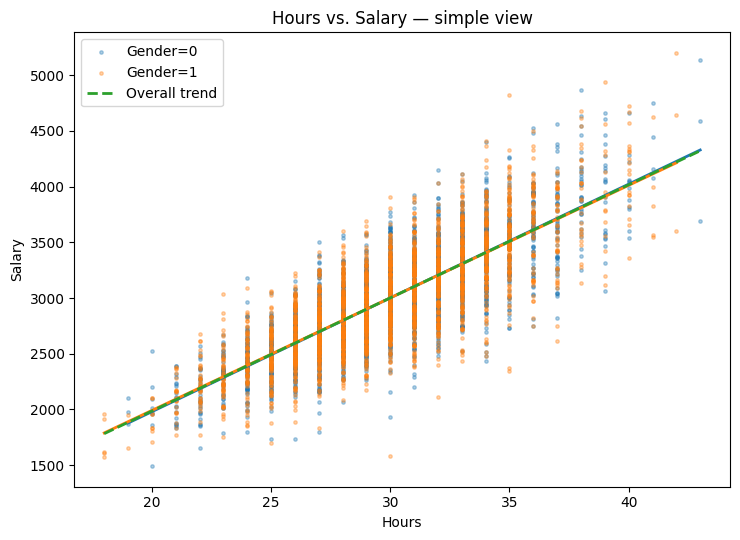

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = data[['Hours']].values
y = data['Salary'].values
overall_model = LinearRegression()
overall_model.fit(X, y)

print(f"Overall slope (should be near 100): {overall_model.coef_[0]:.2f}")
print(f"Overall intercept: {overall_model.intercept_:.2f}")

for g in [0, 1]:
    df = data[data['Gender'] == g]
    m = LinearRegression().fit(df[['Hours']], df['Salary'])
    print(f"Gender {g} -> slope: {m.coef_[0]:.2f}, intercept: {m.intercept_:.2f}")

plt.figure(figsize=(7.5, 5.5))

for g in [0, 1]:
    df = data[data['Gender'] == g]
    plt.scatter(df['Hours'], df['Salary'], s=6, alpha=0.35, label=f'Gender={g}')
    # simple line using numpy.polyfit
    p = np.polyfit(df['Hours'], df['Salary'], 1)
    x_line = np.array([df['Hours'].min(), df['Hours'].max()])
    y_line = p[0]*x_line + p[1]
    plt.plot(x_line, y_line, linewidth=2)

p_all = np.polyfit(data['Hours'], data['Salary'], 1)
x_all = np.array([data['Hours'].min(), data['Hours'].max()])
plt.plot(x_all, p_all[0]*x_all + p_all[1], linestyle='--', linewidth=2, label='Overall trend')

plt.title('Hours vs. Salary — simple view')
plt.xlabel('Hours')
plt.ylabel('Salary')
plt.legend()
plt.tight_layout()
plt.show()